In [205]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow Version : " , tf.__version__)

Tensorflow Version :  2.19.0


Load and preprocess images

In [206]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Change below data_dir PATH to your data set PATH 

In [207]:
from pathlib import Path

data_dir = Path('/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/' )  # replace with your directory
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


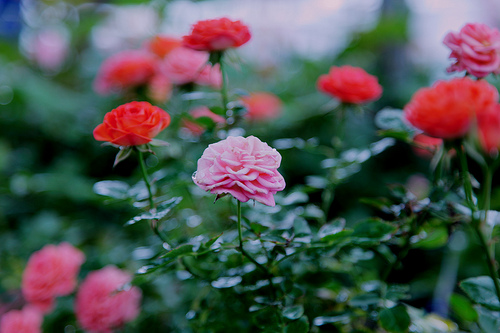

In [208]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

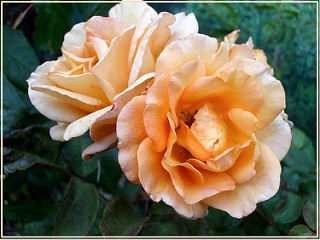

In [209]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

In [210]:
batch_size = 32
img_height = 180
img_width = 180

In [211]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [212]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [213]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


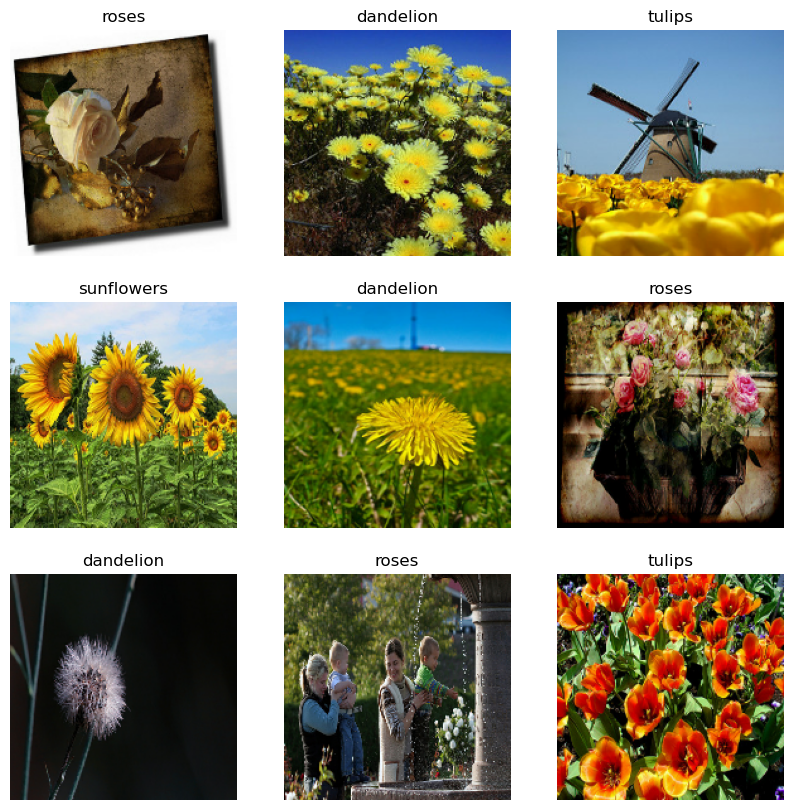

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [215]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [216]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [217]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


In [218]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [219]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [220]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [221]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.3867 - loss: 1.4000 - val_accuracy: 0.5559 - val_loss: 1.0936
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.5910 - loss: 1.0012 - val_accuracy: 0.5967 - val_loss: 1.0109
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.6705 - loss: 0.8389 - val_accuracy: 0.5913 - val_loss: 1.0257
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.7339 - loss: 0.7050 - val_accuracy: 0.6226 - val_loss: 0.9818
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.8019 - loss: 0.5507 - val_accuracy: 0.6199 - val_loss: 1.1290
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 264ms/step - accuracy: 0.8368 - loss: 0.4358 - val_accuracy: 0.6390 - val_loss: 1.1343
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3129s 34s/step - accuracy: 0.8923 - loss: 0.3212 - val_accuracy: 0.6158 - val_loss: 1.3870
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3005s 33s/step - accuracy: 0.9077 - loss: 0.2421 - val_accu

In [222]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [223]:
for f in list_ds.take(5):
  print(f.numpy())

b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/roses/2053476785_c162a3e358.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/tulips/14073608876_49db8ac97d_n.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/roses/483444865_65962cea07_m.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/dandelion/4645101643_9c9d9df13e.jpg'
b'/Users/akshaykumar/Documents/GitHub/AI_ML/Project_for_team/Datasets/flower_photos/dandelion/2538797744_deb53ac253.jpg'


In [224]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['.DS_Store' 'daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [225]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [226]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


In [227]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [228]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [229]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [230]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [231]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  1


In [232]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

2025-05-24 08:50:32.305445: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-24 08:50:33.774357: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-24 08:50:33.775176: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. I

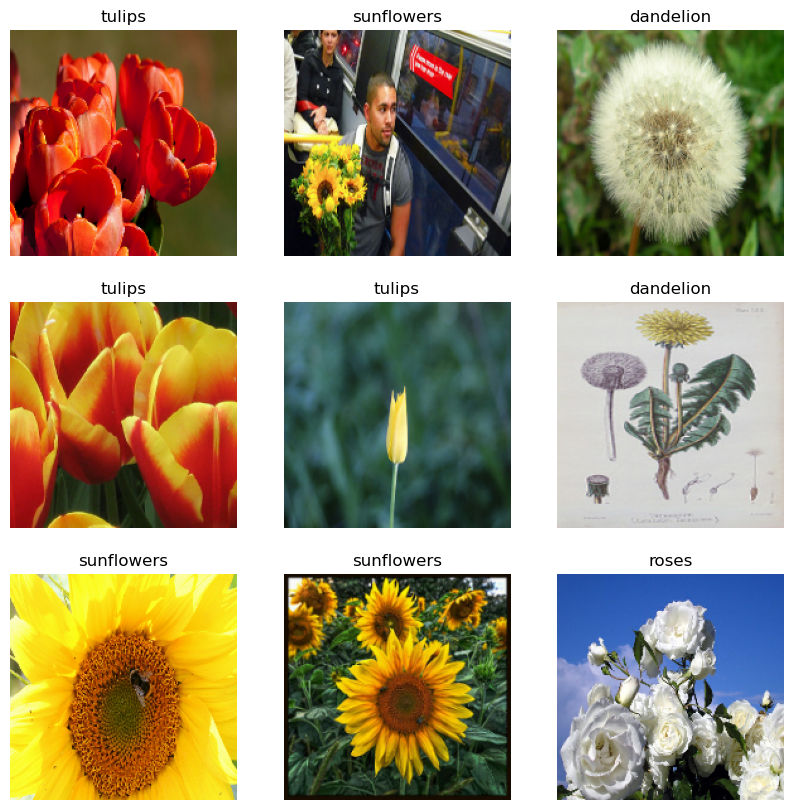

In [233]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [234]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [235]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


2025-05-24 08:50:34.251243: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


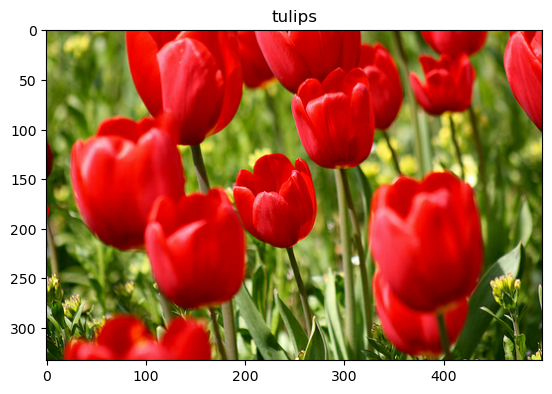

In [236]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [237]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)